In [1]:
#Importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
import os

In [2]:
#Importing the dataset and getting first intuitions
cars = pd.read_csv("cars_predictor.csv")
pd.set_option('display.max_columns', 1000)
cars.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,drive_unit,segment
0,datsun,mi-do,200,1980,with mileage,456799.0,petrol,1600.0,brown,front-wheel drive,NaN
1,gaz,24,25000,1980,with mileage,300.0,petrol,2400.0,other,rear drive,E
2,mazda,323f,600,1980,for parts,3444444.0,petrol,1600.0,silver,NaN,C
3,lada-vaz,2102,500,1980,with mileage,150000.0,petrol,1300.0,blue,rear drive,B
4,mercedes-benz,e-klass,1500,1980,with mileage,500000.0,diesel,2000.0,green,rear drive,E


In [3]:
#Identifiying missing values
missing_values = cars.isnull().sum()
missing_values

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
drive_unit             1327
segment                3693
dtype: int64

In [4]:
# check of numerical attributes
cars.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,39824.000000,39824.000000,3.982400e+04,39794.000000
mean,7449.825457,2003.637103,2.439351e+05,2103.960195
std,8346.286051,7.782664,3.170375e+05,940.014726
min,95.000000,1980.000000,0.000000e+00,500.000000
25%,2379.250000,1998.000000,1.380000e+05,1600.000000
50%,5400.000000,2004.000000,2.290080e+05,1995.000000
75%,9900.000000,2010.000000,3.090000e+05,2300.000000
max,195000.000000,2019.000000,9.999999e+06,20000.000000


In [5]:
#checking for values of categorical attributes 
cat_val = ["make", "model", "condition", "fuel_type", "color",
          "drive_unit","segment"]

for col in cat_val:
    print ([col]," : ",cars[col].unique())

['make']  :  ['datsun' 'gaz' 'mazda' 'lada-vaz' 'mercedes-benz' 'eksklyuziv' 'zaz'
 'opel' 'luaz' 'moskvich' 'audi' 'volkswagen' 'bmw' 'izh' 'fso' 'ford'
 'uaz' 'raf' 'volvo' 'wartburg' 'honda' 'mitsubishi' 'peugeot' 'toyota'
 'nissan' 'renault' 'jaguar' 'porsche' 'subaru' 'daihatsu' 'saab' 'fiat'
 'chevrolet' 'isuzu' 'citroen' 'alfa-romeo' 'aro' 'rover' 'pontiac'
 'lexus' 'seat' 'suzuki' 'hyundai' 'lancia' 'daewoo' 'kia' 'chrysler'
 'jeep' 'skoda' 'mercury' 'lincoln' 'oldsmobile' 'land-rover' 'gmc'
 'proton' 'acura' 'ssangyong' 'plymouth' 'cadillac' 'saturn' 'infiniti'
 'buick' 'smart' 'tata' 'mini' 'maserati' 'scion' 'dacia' 'great-wall'
 'shanghai-maple' 'chery' 'iran-khodro' 'bentley' 'hafei' 'geely' 'lifan'
 'byd' 'jac' 'roewe' 'mg' 'tagaz' 'vortex' 'aston-martin' 'faw' 'tesla'
 'zotye' 'mclaren' 'changan' 'saipa' 'bogdan' 'haval' 'ravon' 'dong-feng']
['model']  :  ['mi-do' '24' '323f' '2102' 'e-klass' '2101' 'retro' '2106' '968' 'rekord'
 '967' '969' 's-klass' 'voennaya-tehnika' 

In [6]:
#Visualization to understand how to clean data
# Filter bad data
cars_c = cars.copy()

array([[<AxesSubplot:xlabel='priceUSD', ylabel='priceUSD'>,
        <AxesSubplot:xlabel='year', ylabel='priceUSD'>,
        <AxesSubplot:xlabel='mileage(kilometers)', ylabel='priceUSD'>,
        <AxesSubplot:xlabel='volume(cm3)', ylabel='priceUSD'>],
       [<AxesSubplot:xlabel='priceUSD', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='mileage(kilometers)', ylabel='year'>,
        <AxesSubplot:xlabel='volume(cm3)', ylabel='year'>],
       [<AxesSubplot:xlabel='priceUSD', ylabel='mileage(kilometers)'>,
        <AxesSubplot:xlabel='year', ylabel='mileage(kilometers)'>,
        <AxesSubplot:xlabel='mileage(kilometers)', ylabel='mileage(kilometers)'>,
        <AxesSubplot:xlabel='volume(cm3)', ylabel='mileage(kilometers)'>],
       [<AxesSubplot:xlabel='priceUSD', ylabel='volume(cm3)'>,
        <AxesSubplot:xlabel='year', ylabel='volume(cm3)'>,
        <AxesSubplot:xlabel='mileage(kilometers)', ylabel='volume(cm3)'>,
        <AxesSubplot:xl

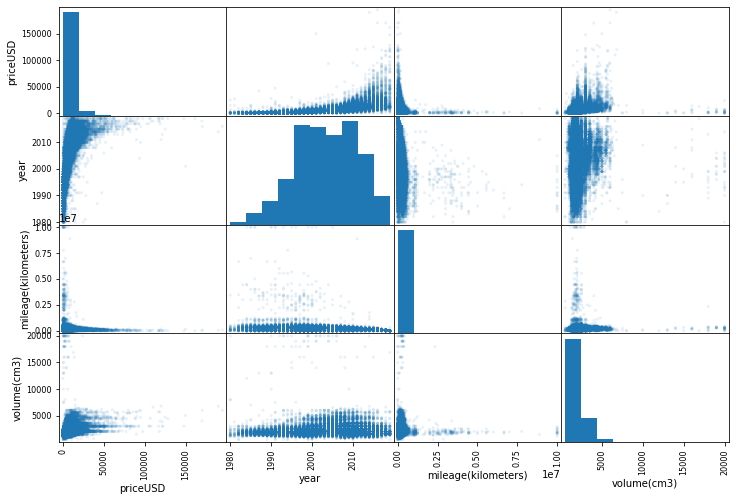

In [7]:
#scattermatrix plot
num_attributes = ["priceUSD", "year", "mileage(kilometers)", "volume(cm3)"]
%matplotlib inline
pd.plotting.scatter_matrix(cars_c[num_attributes], figsize = (12,8), alpha = 0.1)


<AxesSubplot:>

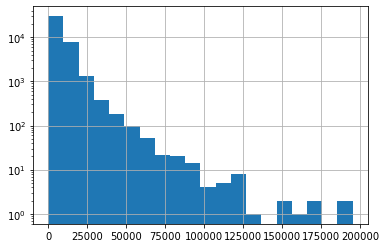

In [8]:
#Histogram of priceUSD
cars_c["priceUSD"].hist(bins = 20, log = True)



In [9]:
#Data Cleansing
# Fresh copy
cars_clean = cars.copy()

# Filter bad data
cars_clean = cars_clean[
    (cars_clean["year"].between(1980, 2019, inclusive=True)) &
    (cars_clean["mileage(kilometers)"].between(0, 10, inclusive=True)) &
    (cars_clean["priceUSD"].between(2379, 195000, inclusive=True)) 
    
    ]
# Replace the NaN-Values
cars_clean['volume(cm3)'].fillna(value=2103.96, inplace=True)
cars_clean['drive_unit'].fillna(value='front-wheel drive', inplace=True)
cars_clean['segment'].fillna(value='J', inplace=True)



In [10]:
# Change categorical attributes dtype to category

for col in cars_clean:
    if cars_clean[col].dtype == "object":
        cars_clean[col] = cars_clean[col].astype('category')


In [11]:
# Assign codes to categorical attribues instead of strings
cat_columns = cars_clean.select_dtypes(['category']).columns

cars_clean[cat_columns] = cars_clean[cat_columns].apply(lambda x: x.cat.codes)
    

In [12]:
# Drop probably unuseful columns

drop_cols = ["color"]
cars_clean = cars_clean.drop(drop_cols, axis=1)
cars_clean.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),drive_unit,segment
78,29,79,2450,1982,0,0.0,0,1600.0,3,7
927,29,32,2500,1987,0,1.0,1,1800.0,1,2
1238,11,80,2999,1988,0,10.0,0,2200.0,2,6
1700,0,1,2500,1990,0,0.0,1,2200.0,0,4
2314,19,50,4500,1991,0,1.0,1,3000.0,2,6


In [13]:
# Getting the train and test sets
train_set, test_set = train_test_split(cars_clean, test_size = 0.2, random_state = 42)


In [14]:
# Seperation of Predictors (Features) and the Labels (Targets)

cars_price = train_set["priceUSD"].copy()
cars = train_set.drop("priceUSD", axis=1)


In [15]:
#Custom-Transformers and Pipelines
# Create a class to select numerical or categorical columns 

class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [16]:
# Setting categorical and numerical attributes

cat_attribs = ["make", "model", "condition", "fuel_type", "drive_unit", "segment"]
num_attribs = list(cars.drop(cat_attribs, axis=1))


In [17]:
# Building the Pipelines

num_pipeline = Pipeline([
    ("selector", DFSelector(num_attribs)),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DFSelector(cat_attribs)),
    ("encoder", OneHotEncoder(sparse=True))
])

full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

cars_prepared = full_pipeline.fit_transform(cars_clean[:128])

In [18]:
# Training and Comparing Models
#LINEAR REGRESSION MODEL
lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_price)

from sklearn.metrics import mean_squared_error
cars_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(cars_price, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

cars_predictions[0:4]

list(cars_price[0:4])

[67900, 2999, 27480, 4000]

In [19]:
#DECISION TREE REGRESSION MODEL
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(cars_prepared, cars_price)

cars_predictions = tree_reg.predict(cars_prepared)
tree_mse = mean_squared_error(cars_price, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

3746.864574631034

In [20]:
#RANDOM FOREST REGRESSION MODEL
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30 )
forest_reg.fit(cars_prepared, cars_price)
cars_predictions = forest_reg.predict(cars_prepared)

forest_mse = mean_squared_error(cars_price, cars_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


9565.905042598422

In [21]:
#Cross-Validation

from sklearn.model_selection import cross_val_score

def display_scores(scores):
    
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [22]:
#LinReg - CrossValidation
# Offline i used CV=10

scores = cross_val_score(lin_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [29619.91957798 31401.58274443 30035.57024611 32573.61921884]
Mean: 30907.67294683881
Standard deviation: 1165.9969692249556


In [23]:
#DecissionTree - CrossValidation
# Offline i used CV=10

scores = cross_val_score(tree_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [24104.58316379 29828.46932986 20461.45102229 26422.75534873]
Mean: 25204.3147161667
Standard deviation: 3412.1682612541395


In [24]:
#RandomForest - CrossValidation
# Offline i used CV=8

from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=2)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)


Scores: [27959.55115734 25818.25412098]
Mean: 26888.90263915895
Standard deviation: 1070.64851817801


In [25]:
# Feature Importance

feature_importances = forest_reg.feature_importances_
feature_importances
cat_encoder = cat_pipeline.named_steps["encoder"]


In [26]:
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs #+ cat_encoder
sorted(zip(feature_importances, attributes), reverse=True)


[(0.10945778308931406, 'volume(cm3)'),
 (0.08482990959867821, 'year'),
 (0.04248472114840552, 'mileage(kilometers)')]

In [28]:
#Final Prediction and conclusion

final_model = forest_reg

cars_test = test_set.drop("priceUSD", axis = 1)
cars_price_test = test_set["priceUSD"].copy()




In [29]:
#Evaluation how good the model fit is
from sklearn.metrics import mean_squared_error

final_error=  mean_squared_error(cars_price_test, cars_predictions[:33])

final_rmse = np.sqrt(final_error)

In [30]:
print(final_error)

536311890.2454835


In [31]:
print(final_rmse)

23158.408629383055
